<a href="https://colab.research.google.com/github/yslikitha/CustomerAnalysis/blob/main/Champo_Clustering_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
#load the data
data=pd.read_excel('champodata.xlsx','Data for Clustering')

In [ ]:
data.head()

,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
0,A-11,2466,139.5900,1.854041e+05,1021,1445,0,0,0,0,0,0,0,0
1,A-6,131,2086.0000,6.247460e+03,0,0,25,106,0,0,0,0,0,0
2,A-9,18923,53625.6544,1.592080e+06,3585,0,175,714,11716,2116,617,0,0,0
3,B-2,624,202.8987,1.481116e+04,581,0,0,2,0,41,0,0,0,0
4,B-3,464,8451.5625,5.862687e+04,0,0,459,5,0,0,0,0,0,0


In [ ]:
data.shape

(45, 14)

### 2.Data Wrangling

2.a.Data Cleaning

There are no missing values in the given data.

All the data is in the correct format.


In [ ]:
data.dtypes

Row Labels             object
Sum of QtyRequired      int64
Sum of TotalArea      float64
Sum of Amount         float64
DURRY                   int64
HANDLOOM                int64
DOUBLE BACK             int64
JACQUARD                int64
HAND TUFTED             int64
HAND WOVEN              int64
KNOTTED                 int64
GUN TUFTED              int64
Powerloom Jacquard      int64
INDO TEBETAN            int64
dtype: object

In [ ]:
#data.set_index('Row Labels', inplace=True)
#data.head()

2.b.Data Standardization

In [ ]:
#data = StandardScaler().fit_transform(data)


2.c.Data Normalisation

It is not recommended in k-means clustering algorithm as it can distort the relative distances and cluster shapes

2.d.Binning, is not used
2.e.Indicator variable(one-hot encoding)here it is not necessary

### 3.EDA


3.b.Statstical analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_18792\2292917711.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


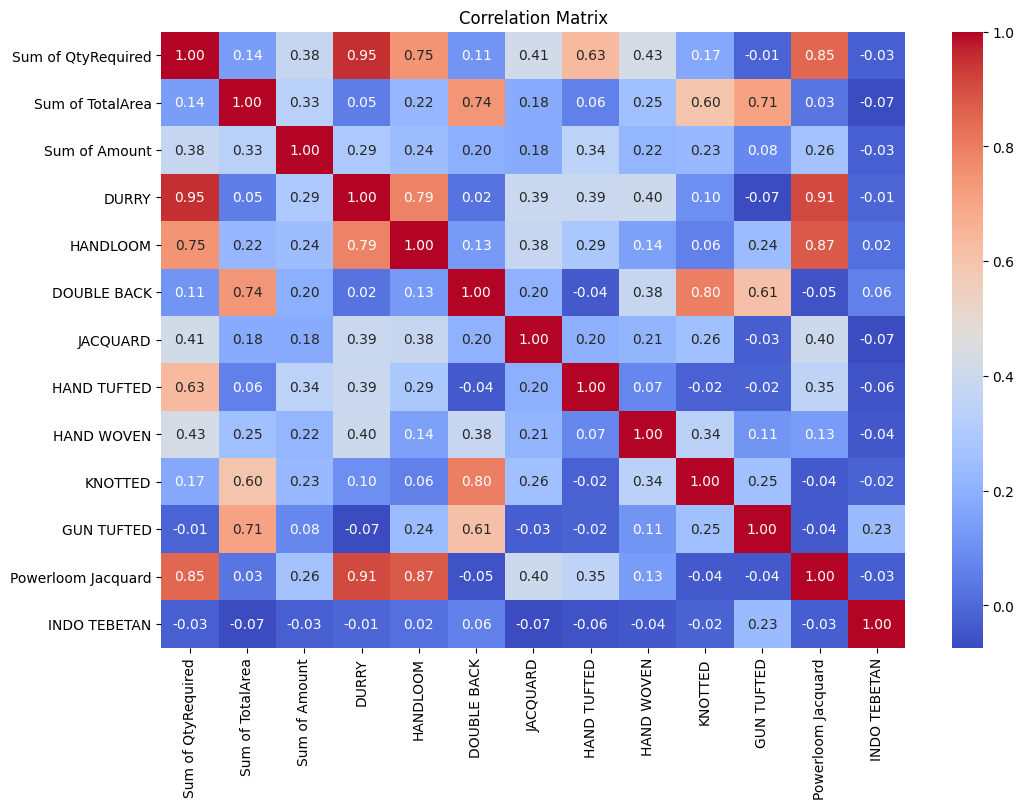

In [ ]:

np.bool=np.bool_
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Count')

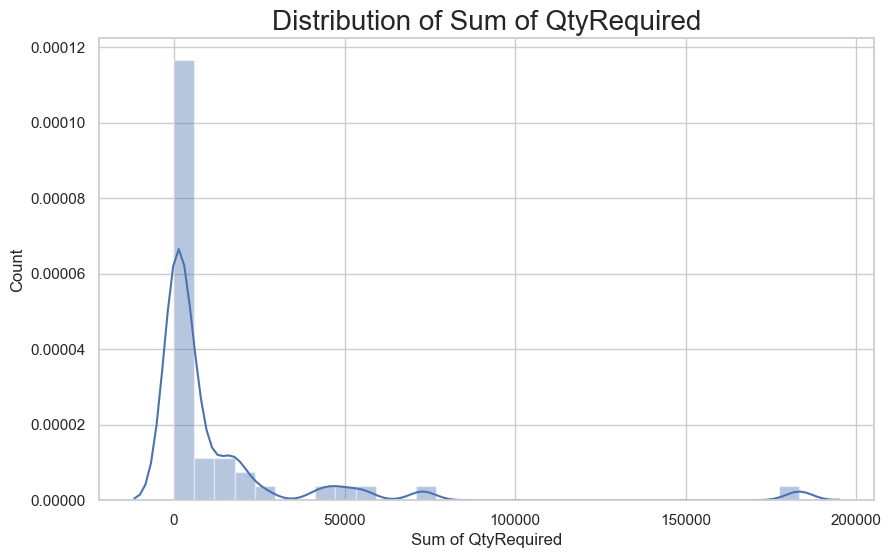

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Sum of QtyRequired'])
plt.title('Distribution of Sum of QtyRequired', fontsize = 20)
plt.xlabel('Sum of QtyRequired')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

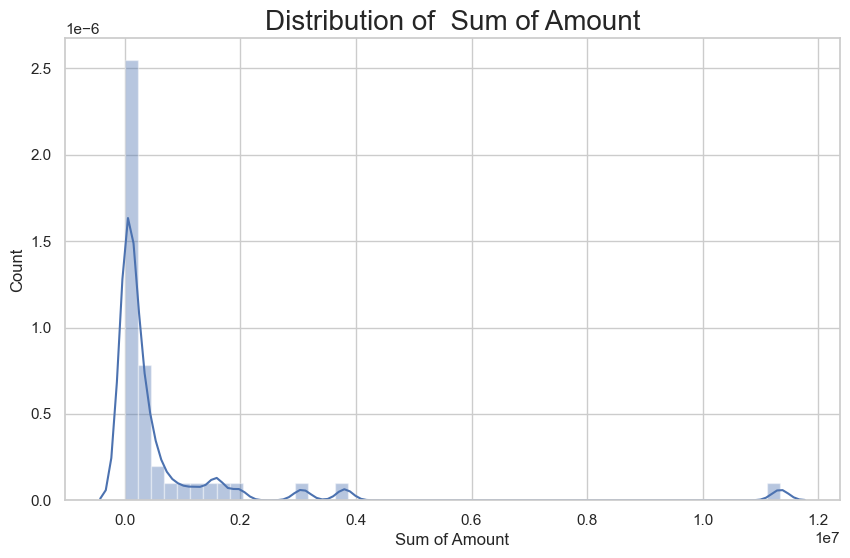

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Sum of Amount'])
plt.title('Distribution of  Sum of Amount', fontsize = 20)
plt.xlabel('Sum of Amount')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

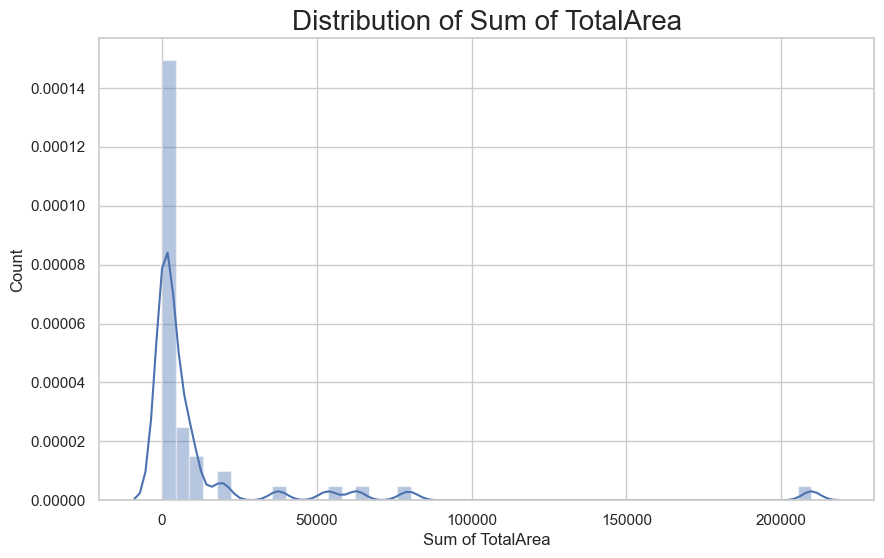

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Sum of TotalArea'])
plt.title('Distribution of Sum of TotalArea', fontsize = 20)
plt.xlabel('Sum of TotalArea')
plt.ylabel('Count')


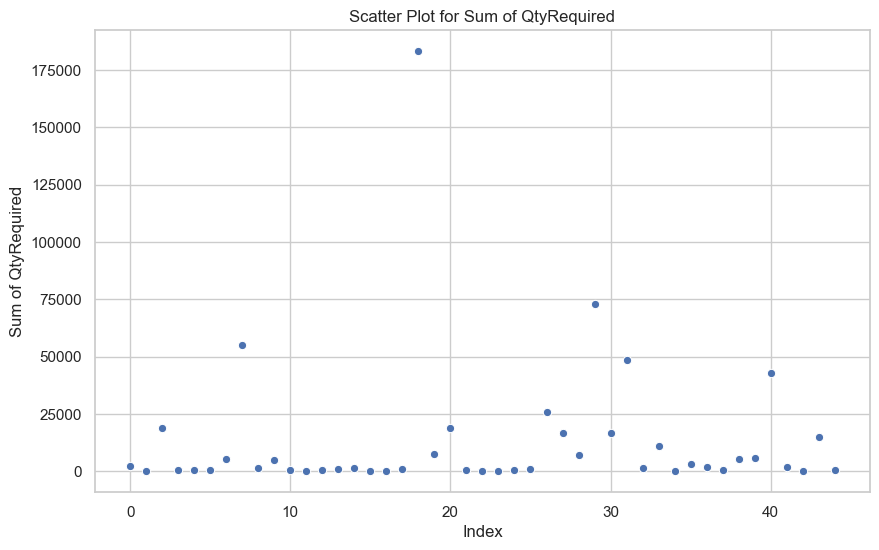

In [ ]:

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['Sum of QtyRequired'])
plt.title('Scatter Plot for Sum of QtyRequired')
plt.xlabel('Index')
plt.ylabel('Sum of QtyRequired')
plt.show()


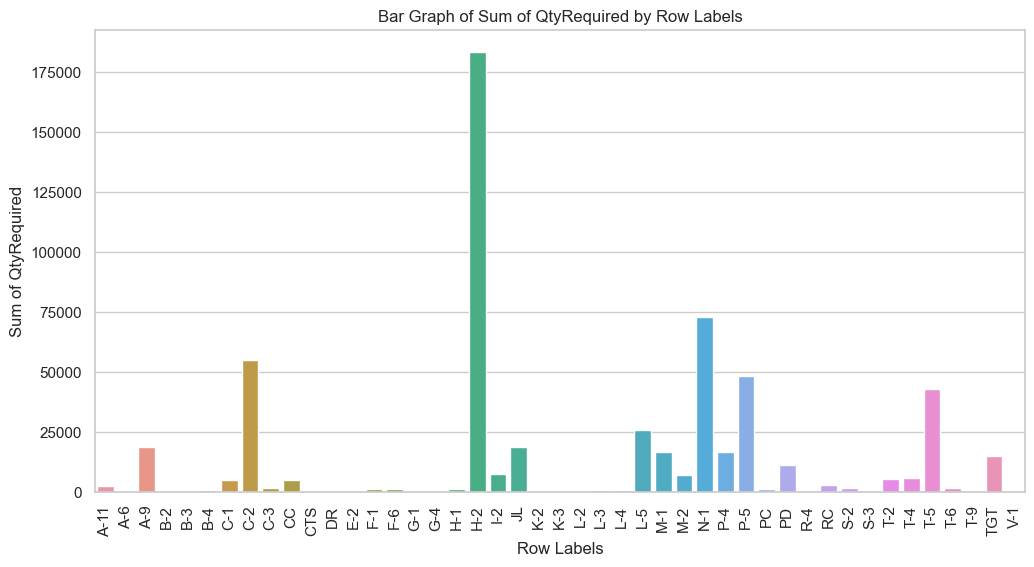

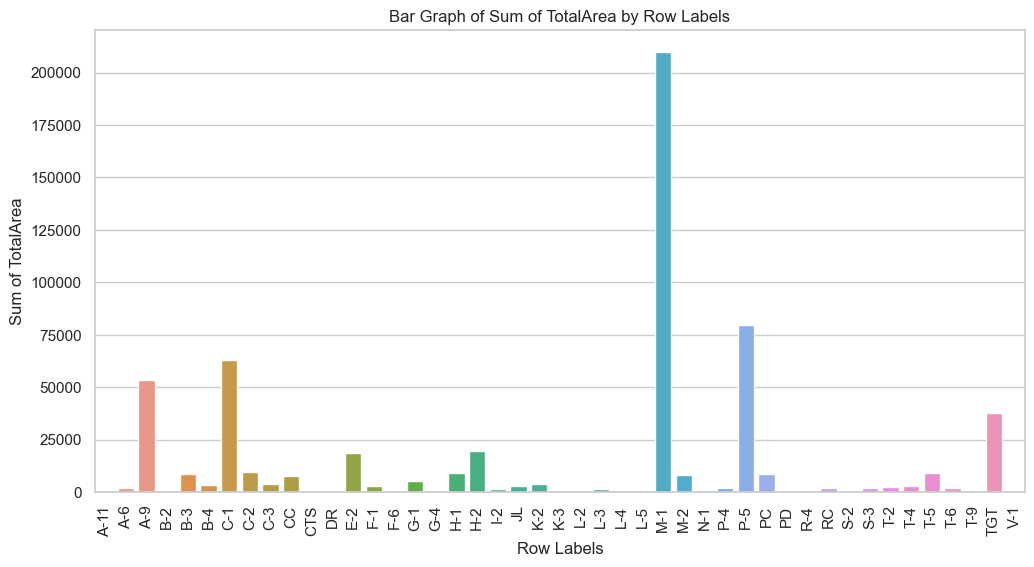

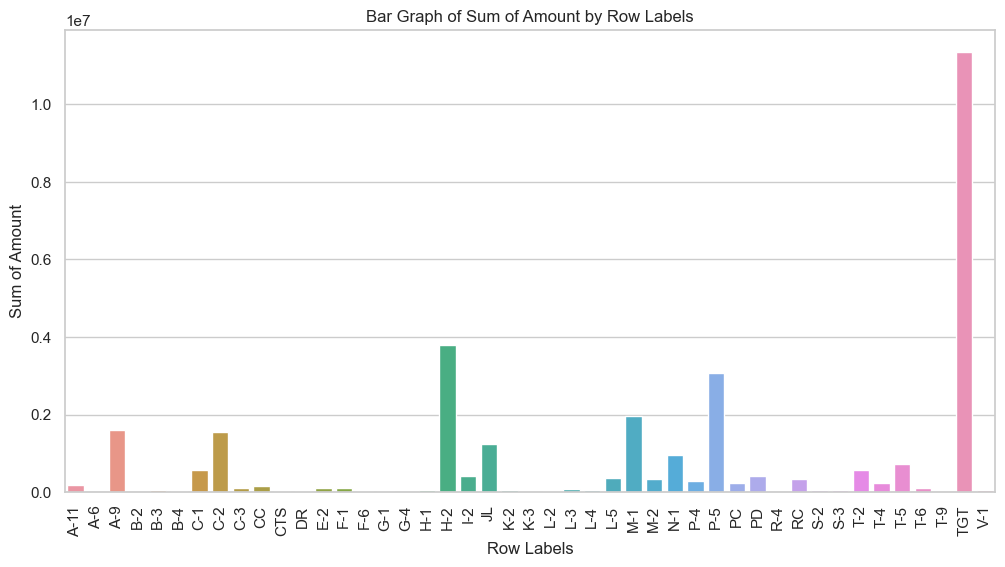

In [ ]:
np.float=np.float_
# Plot bar graphs
columns_to_plot = ['Sum of QtyRequired', 'Sum of TotalArea', 'Sum of Amount']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Row Labels', y=column, data=data)
    plt.title(f'Bar Graph of {column} by Row Labels')
    plt.xlabel('Row Labels')
    plt.ylabel(column)
    plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long
    plt.show()

In [ ]:
data.head()

,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
0,A-11,2466,139.5900,1.854041e+05,1021,1445,0,0,0,0,0,0,0,0
1,A-6,131,2086.0000,6.247460e+03,0,0,25,106,0,0,0,0,0,0
2,A-9,18923,53625.6544,1.592080e+06,3585,0,175,714,11716,2116,617,0,0,0
3,B-2,624,202.8987,1.481116e+04,581,0,0,2,0,41,0,0,0,0
4,B-3,464,8451.5625,5.862687e+04,0,0,459,5,0,0,0,0,0,0


In [ ]:
#filtered_data = data[~data['Row Labels'].str.contains('TGT|M-1|H-2')]

In [ ]:
# Set 'Row Labels' as the index
X = data.set_index('Row Labels')
X.head()

,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
Row Labels,,,,,,,,,,,,,
A-11,2466,139.5900,1.854041e+05,1021,1445,0,0,0,0,0,0,0,0
A-6,131,2086.0000,6.247460e+03,0,0,25,106,0,0,0,0,0,0
A-9,18923,53625.6544,1.592080e+06,3585,0,175,714,11716,2116,617,0,0,0
B-2,624,202.8987,1.481116e+04,581,0,0,2,0,41,0,0,0,0
B-3,464,8451.5625,5.862687e+04,0,0,459,5,0,0,0,0,0,0


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Display the DataFrame with 'Row Labels' as the index
print(X_scaled_df.head())


            Sum of QtyRequired  Sum of TotalArea  Sum of Amount     DURRY  \
Row Labels                                                                  
A-11                 -0.347957         -0.378920      -0.286682 -0.277553   
A-6                  -0.425251         -0.321822      -0.386838 -0.324147   
A-9                   0.196808          1.190093       0.499714 -0.160545   
B-2                  -0.408931         -0.377063      -0.382051 -0.297633   
B-3                  -0.414227         -0.135088      -0.357556 -0.324147   

            HANDLOOM  DOUBLE BACK  JACQUARD  HAND TUFTED  HAND WOVEN  \
Row Labels                                                             
A-11        2.096088    -0.353532 -0.514416    -0.372284   -0.362852   
A-6        -0.308777    -0.331865  0.095366    -0.372284   -0.362852   
A-9        -0.308777    -0.201861  3.592985     0.822420    0.522021   
B-2        -0.308777    -0.353532 -0.502911    -0.372284   -0.345706   
B-3        -0.308777     0.0

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

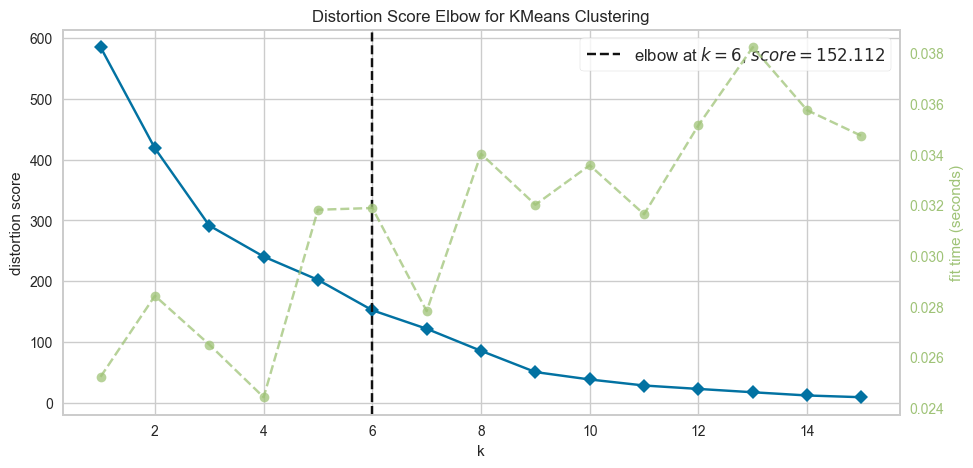

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,16),size=(1080, 500))

visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
# First lets build a model with 6 clusters

kmeans = KMeans(n_clusters = 6, init='k-means++',random_state=42)
kmeans.fit(X_scaled_df)

# print the silhouette score of this model

print("silhouette_score is :",silhouette_score(X_scaled_df, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.5914671421079448


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add cluster labels to X_scaled_df
X_scaled_df['Cluster'] = kmeans.labels_
X_scaled_df.head()

,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN,Cluster
Row Labels,,,,,,,,,,,,,,
A-11,-0.347957,-0.378920,-0.286682,-0.277553,2.096088,-0.353532,-0.514416,-0.372284,-0.362852,-0.246093,-0.24114,-0.150756,-0.208941,0
A-6,-0.425251,-0.321822,-0.386838,-0.324147,-0.308777,-0.331865,0.095366,-0.372284,-0.362852,-0.246093,-0.24114,-0.150756,-0.208941,0
A-9,0.196808,1.190093,0.499714,-0.160545,-0.308777,-0.201861,3.592985,0.822420,0.522021,0.169046,-0.24114,-0.150756,-0.208941,2
B-2,-0.408931,-0.377063,-0.382051,-0.297633,-0.308777,-0.353532,-0.502911,-0.372284,-0.345706,-0.246093,-0.24114,-0.150756,-0.208941,0
B-3,-0.414227,-0.135088,-0.357556,-0.324147,-0.308777,0.044278,-0.485653,-0.372284,-0.362852,-0.246093,-0.24114,-0.150756,-0.208941,0


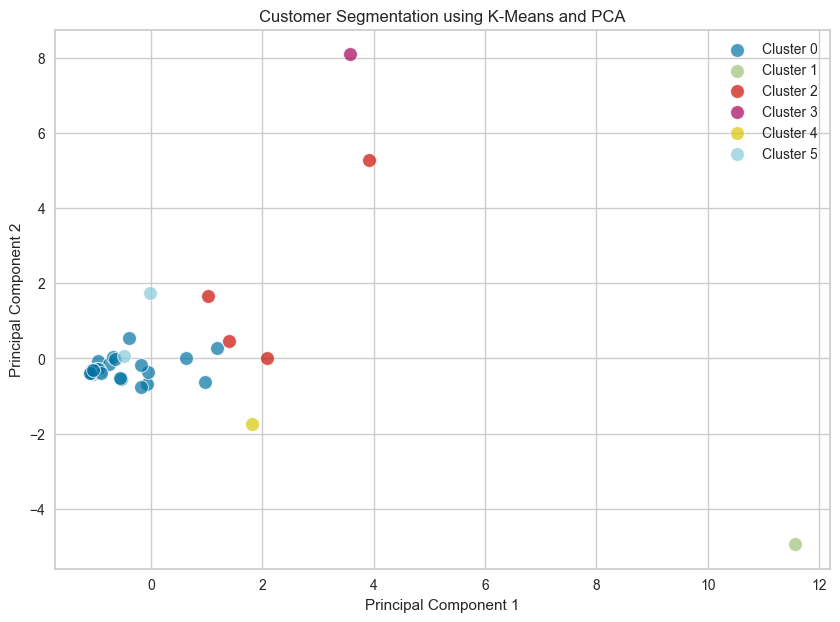

In [ ]:
import numpy as np
np.float=np.float_
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA on the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA-transformed data
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Add cluster labels to pca_df
pca_df['Cluster'] = kmeans.labels_




# Get unique cluster labels
unique_labels = np.unique(kmeans.labels_)

# Plot the clusters
plt.figure(figsize=(10, 7))
for label in unique_labels:
    cluster_data = pca_df[pca_df['Cluster'] == label]
    sns.scatterplot(data=cluster_data, x='PCA1', y='PCA2', label=f'Cluster {label}', s=100, alpha=0.7)

plt.title('Customer Segmentation using K-Means and PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
# Assuming you have already defined the DataFrame 'data' with 'label' column containing cluster labels and 'Row Labels' column containing customer names
data['Cluster'] = kmeans.labels_
for cluster_label in range(6):
    cluster_data = data[data["Cluster"] == cluster_label]
    print('Number of customers in group', cluster_label, ':', len(cluster_data))
    print('They are:', cluster_data["Row Labels"].values)


Number of customers in group 0 : 36
They are: ['A-11' 'A-6' 'B-2' 'B-3' 'B-4' 'C-1' 'C-3' 'CC' 'CTS' 'DR' 'E-2' 'F-1'
 'F-6' 'G-1' 'G-4' 'H-1' 'I-2' 'K-2' 'K-3' 'L-2' 'L-3' 'L-4' 'L-5' 'M-2'
 'P-4' 'PC' 'R-4' 'RC' 'S-2' 'S-3' 'T-4' 'T-5' 'T-6' 'T-9' 'TGT' 'V-1']
Number of customers in group 1 : 1
They are: ['H-2']
Number of customers in group 2 : 4
They are: ['A-9' 'C-2' 'JL' 'P-5']
Number of customers in group 3 : 1
They are: ['M-1']
Number of customers in group 4 : 1
They are: ['N-1']
Number of customers in group 5 : 2
They are: ['PD' 'T-2']


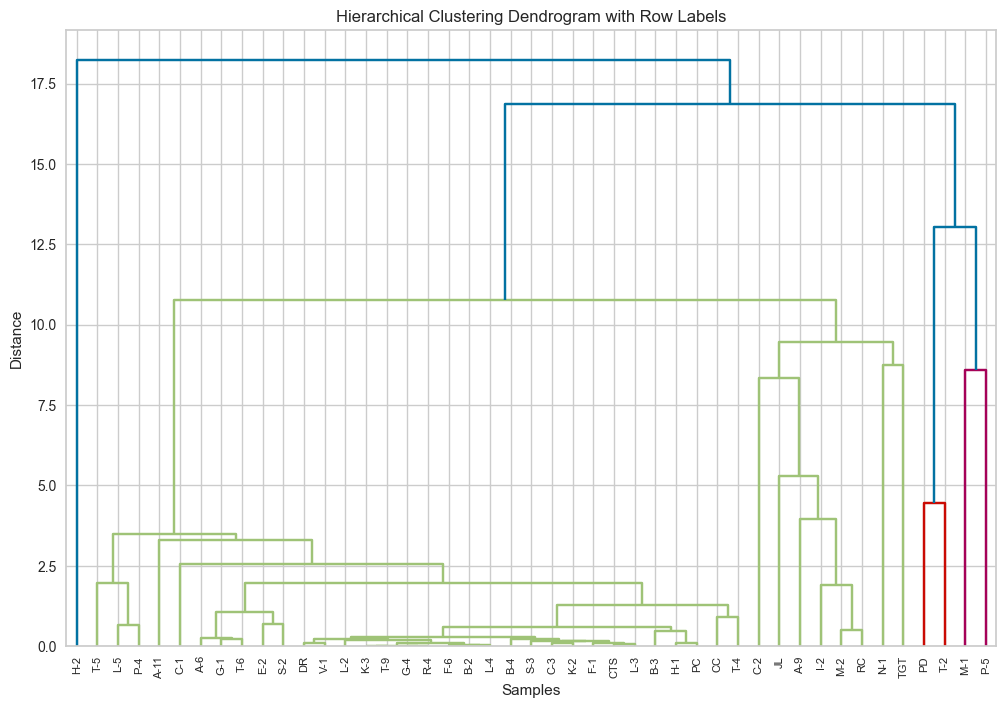

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Set 'Row Labels' as the index
X_scaled_df_with_labels = X_scaled_df.copy()
X_scaled_df_with_labels['Row Labels'] = X.index
X_scaled_df_with_labels = X_scaled_df_with_labels.set_index('Row Labels')

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled_df_with_labels, method='ward')#wards method minimizes the total within cluster variance

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=X.index)
plt.title('Hierarchical Clustering Dendrogram with Row Labels')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
